In [ ]:
from dotenv import load_dotenv
from pathlib import Path
from pdf_to_imgs_node import PdfToImagesNode
from step_panel_detector_node import DetectStepPanelsNode
from yolo_step_panel_detector import StepPanelDetector
from crop_step_panel_node import CropStepPanelsNode
from final_graph import build_ikea_full_graph

In [2]:
load_dotenv()

True

In [3]:
pdf_node = PdfToImagesNode(
    artifact_root=Path(r"C:\Users\Kenan\Desktop\IKEA_Project\IKEA_assembly_guide_assistent\artifacts_test"),
    dpi=200,
)

# --- YOLO detector
detector = StepPanelDetector(
    weights_path=r"C:\Windows\System32\runs\detect\train\weights\best.pt",
    conf=0.20,
    iou=0.7,
    device="cuda:0",
)

detect_node = DetectStepPanelsNode(detector)

# --- crop node
crop_node = CropStepPanelsNode(
    artifacts_root=Path(r"C:\Users\Kenan\Desktop\IKEA_Project\IKEA_assembly_guide_assistent\artifacts_test"),
    padding_px=16,
    cache_policy="use_cache",
)

In [4]:
graph = build_ikea_full_graph(pdf_node, detect_node, crop_node)

state0 = {
    "pdf_source": {"kind": "path", "path": r"C:\Users\Kenan\Desktop\IKEA_Project\IKEA_assembly_guide_assistent\pdfs\ikea2.pdf", "filename": "ikea2.pdf"}
}

final_state = graph.invoke(state0)

In [5]:
final_state.keys()

dict_keys(['pdf_source', 'pdf_render', 'panel_detections', 'step_crops', 'current_step', 'step_analyses', 'messages', 'final_instructions'])

In [6]:
final_state["final_instructions"]

{'raw': '```json\n{\n  "assembly_instructions": [\n    {\n      "step_id": "079e27_p006_s00",\n      "action_summary": "Insert screws into the designated holes on the panels.",\n      "objects": ["panel_1", "panel_2", "panel_3", "panel_4"],\n      "fasteners": ["screw_130449"],\n      "quantities": {\n        "screw_130449": 16\n      },\n      "warnings": [],\n      "dependencies": [],\n      "confidence": 0.95\n    },\n    {\n      "step_id": "079e27_p006_s01",\n      "action_summary": "Attach the hardware to the panels using a hammer and screwdriver.",\n      "objects": ["panel"],\n      "fasteners": ["116713", "100365"],\n      "quantities": {\n        "116713": 6,\n        "100365": 12\n      },\n      "warnings": ["Do not use fastener 117292."],\n      "dependencies": [],\n      "confidence": 0.95\n    },\n    {\n      "step_id": "079e27_p007_s00",\n      "action_summary": "Attach two vertical panels to a horizontal base using screws.",\n      "objects": ["vertical panel", "horiz

In [7]:
from helpers import _parse_vision_json

In [8]:
type(final_state["final_instructions"]["raw"])

str

In [9]:
_parse_vision_json(final_state["final_instructions"]["raw"])

{'assembly_instructions': [{'step_id': '079e27_p006_s00',
   'action_summary': 'Insert screws into the designated holes on the panels.',
   'objects': ['panel_1', 'panel_2', 'panel_3', 'panel_4'],
   'fasteners': ['screw_130449'],
   'quantities': {'screw_130449': 16},
   'warnings': [],
   'dependencies': [],
   'confidence': 0.95},
  {'step_id': '079e27_p006_s01',
   'action_summary': 'Attach the hardware to the panels using a hammer and screwdriver.',
   'objects': ['panel'],
   'fasteners': ['116713', '100365'],
   'quantities': {'116713': 6, '100365': 12},
   'warnings': ['Do not use fastener 117292.'],
   'dependencies': [],
   'confidence': 0.95},
  {'step_id': '079e27_p007_s00',
   'action_summary': 'Attach two vertical panels to a horizontal base using screws.',
   'objects': ['vertical panel', 'horizontal base'],
   'fasteners': ['screw'],
   'quantities': {'vertical panel': 2, 'horizontal base': 1, 'screw': 4},
   'warnings': [],
   'dependencies': [],
   'confidence': 0.95}

In [10]:
final_state["messages"]

[{'role': 'system',
  'content': 'You are running a 2-agent IKEA step analysis pipeline.'},
 {'role': 'user',
  'content': 'Analyze next step index=0 step_id=079e27_p006_s00. Return STRICT JSON only with keys: step_id, action_summary, objects, fasteners, quantities, warnings, dependencies, confidence.'},
 {'role': 'assistant',
  'content': 'Step analyst output for 079e27_p006_s00: ```json\n{\n  "step_id": "079e27_p006_s00",\n  "action_summary": "Insert screws into the designated holes on the panels.",\n  "objects": ["panel_1", "panel_2", "panel_3", "panel_4"],\n  "fasteners": ["screw_130449"],\n  "quantities": {\n    "screw_130449": 16\n  },\n  "warnings": [],\n  "dependencies": [],\n  "confidence": 0.95\n}\n```'},
 {'role': 'user',
  'content': 'Analyze next step index=1 step_id=079e27_p006_s01. Return STRICT JSON only with keys: step_id, action_summary, objects, fasteners, quantities, warnings, dependencies, confidence.'},
 {'role': 'assistant',
  'content': 'Step analyst output for 

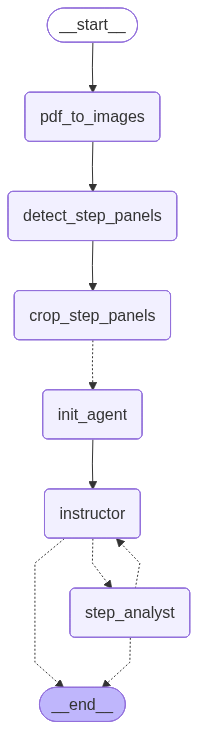

In [11]:
graph